# Catalonia independence dataset

In [1]:
import pandas as pd
import collections
from matplotlib import pyplot as plt
import numpy as np
#Function on CSS created for this
from IPython.display import display_html

In [2]:
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

# Spanish Dataset

In [3]:
#training data - spanish
spanish_train = pd.read_csv('catalonia-independence-corpus-master/spanish_train.csv', 
                            dtype={'id_str': 'str'}, sep='\t', encoding="utf-8")
spanish_train.head(5)                           # Check the first 5 rows

,id_str,TWEET,LABEL
0,1099284472267182080,RT @EFEnoticias: Arrimadas se presenta a las g...,AGAINST
1,1102569937447673856,@gabrielrufian Derecho a la autodeterminación ...,AGAINST
2,1097576883464609793,#URGENTE ???? #Cataluña: Los CDR atacan con pi...,AGAINST
3,1097475970355904514,Cansado de los eslóganes de izquierdas y derec...,AGAINST
4,1093133896936505345,Le recuerdo a @EnricJuliana que en Cataluña lo...,NEUTRAL


In [4]:
#Validation data - spanish
spanish_val = pd.read_csv('catalonia-independence-corpus-master/spanish_val.csv', 
                            dtype={'id_str': 'str'}, sep='\t', encoding="utf-8")
spanish_val.head(5)                           # Check the first 5 rows

,id_str,TWEET,LABEL
0,1098900866189402114,Recuerda que #AntonioMachado se exilió para qu...,FAVOR
1,1098884082090631168,Un problema llamado federalismo. Mientras no n...,FAVOR
2,1046494423092264961,#FelizSábado Mi apoyo y cariño para la gran pe...,AGAINST
3,1092208306800734210,@iguardans Lo digo porque muchos que jamás se ...,AGAINST
4,1096002407983665152,@publico_es @Alopezdemiguel El juicio a los pr...,FAVOR


In [5]:
#Test data - spanish
spanish_test = pd.read_csv('catalonia-independence-corpus-master/spanish_test.csv', 
                            dtype={'id_str': 'str'}, sep='\t', encoding="utf-8")
spanish_test.head(5)                           # Check the first 5 rows

,id_str,TWEET,LABEL
0,1097764182328594432,En Valencia se pasa hambre pero no parece ser ...,AGAINST
1,1103349523382919169,Así era el proyecto de Constitución catalana: ...,AGAINST
2,1097806427215839232,Necesitamos un Gobierno valiente y que defien...,AGAINST
3,1095963036693733376,“Joder con los indepes que no se venden como h...,FAVOR
4,1103603343740551170,Antoni Puigverd se queja de que Millo no facil...,AGAINST


In [6]:
#statistics
uniquelabels_tr = spanish_train['LABEL'].unique()
print("Training data contains %d unique labels/stans" % len(uniquelabels_tr))

uniquelabels_val = spanish_val['LABEL'].unique()
print("Validation data contains %d unique labels/stans" % len(uniquelabels_val))

uniquelabels_test = spanish_test['LABEL'].unique()
print("Test data contains %d unique labels/stans" % len(uniquelabels_test))

Training data contains 3 unique labels/stans
Validation data contains 3 unique labels/stans
Test data contains 3 unique labels/stans


In [7]:
tr_label_counts = collections.Counter(spanish_train['LABEL'])
print("Training Data", tr_label_counts)

val_label_counts = collections.Counter(spanish_val['LABEL'])
print("Validation Data", val_label_counts)

test_label_counts = collections.Counter(spanish_test['LABEL'])
print("Test Data", test_label_counts)

Training Data Counter({'FAVOR': 2515, 'AGAINST': 2420, 'NEUTRAL': 1111})
Validation Data Counter({'AGAINST': 856, 'FAVOR': 782, 'NEUTRAL': 377})
Test Data Counter({'AGAINST': 829, 'FAVOR': 807, 'NEUTRAL': 380})


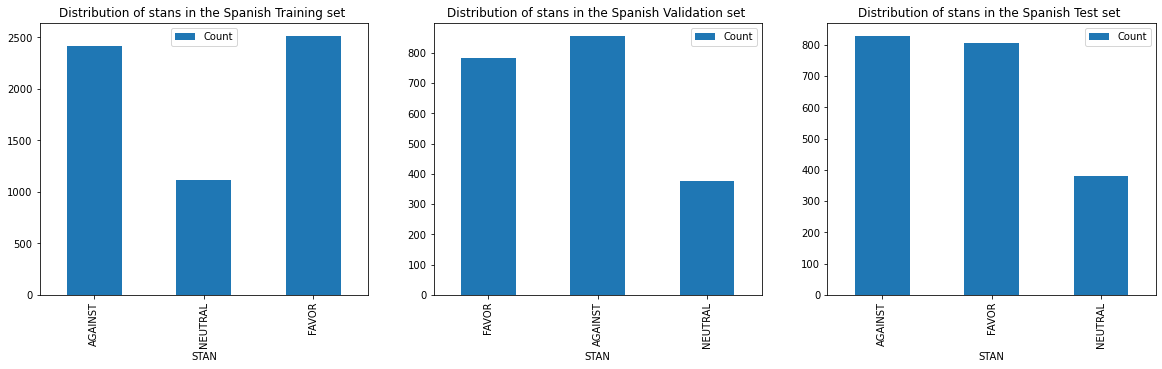

In [8]:
figure, axes = plt.subplots(1, 3,figsize=(20,5))

tr_list=[]
for label in tr_label_counts:
  tr_list.append([label,tr_label_counts[label],np.round(tr_label_counts[label] / len(spanish_train),3)])
tr_label = pd.DataFrame(tr_list,columns=['STAN','Count','Prior_probabilities'])
tr_label.plot.bar(x='STAN', y='Count', ax=axes[0])
axes[0].title.set_text("Distribution of stans in the Spanish Training set ")

val_list=[]
for label in val_label_counts:
  val_list.append([label,val_label_counts[label],np.round(val_label_counts[label] / len(spanish_val),3)])
val_label = pd.DataFrame(val_list,columns=['STAN','Count','Prior_probabilities'])
val_label.plot.bar(x='STAN', y='Count', ax=axes[1])
axes[1].title.set_text("Distribution of stans in the Spanish Validation set ")

test_list=[]
for label in test_label_counts:
  test_list.append([label,test_label_counts[label],np.round(test_label_counts[label] / len(spanish_test),3)])
test_label = pd.DataFrame(test_list,columns=['STAN','Count','Prior_probabilities'])
test_label.plot.bar(x='STAN', y='Count', ax=axes[2])
axes[2].title.set_text("Distribution of stans in the Spanish Test set ")

In [9]:
print("Label Distribution in Training set   Label Distribution in Validation set   Label Distribution in Test set")
display_side_by_side(tr_label,val_label, test_label)

Label Distribution in Training set   Label Distribution in Validation set   Label Distribution in Test set


,STAN,Count,Prior_probabilities
0,AGAINST,2420,0.400
1,NEUTRAL,1111,0.184
2,FAVOR,2515,0.416
,STAN,Count,Prior_probabilities
0,FAVOR,782,0.388
1,AGAINST,856,0.425
2,NEUTRAL,377,0.187
,STAN,Count,Prior_probabilities
0,AGAINST,829,0.411
1,FAVOR,807,0.400


# Catalan Dataset

In [10]:
#training data - catalan
catalan_train = pd.read_csv('catalonia-independence-corpus-master/catalan_train.csv', 
                            dtype={'id_str': 'str'}, sep='\t', encoding="utf-8")
catalan_train.head(5)                           # Check the first 5 rows

,id_str,TWEET,LABEL
0,11028517837209518e+18,En @fgarrobo ha fet més per l’independentisme ...,AGAINST
1,1098892781681082368,Divendres 22F acte Cloenda campanya de les can...,FAVOR
2,10990323264895959e+18,Puigdemont porta a la Defensora del Poble euro...,NEUTRAL
3,110251884676898e+18,"José Antonio Nieto, ex-secretari d'Estat de Se...",NEUTRAL
4,1093081744193081344,Es passen dies denunciant l'autocar amb que va...,FAVOR


In [11]:
#Validation data - catalan
catalan_val = pd.read_csv('catalonia-independence-corpus-master/catalan_val.csv', 
                            dtype={'id_str': 'str'}, sep='\t', encoding="utf-8")
catalan_val.head(5)                           # Check the first 5 rows

,id_str,TWEET,LABEL
0,1096086953441849344,@laxarxaxanante1 @Capidja @Foxxthefox @estartu...,FAVOR
1,11029292541808067e+18,Els organitzadors del Tanga! Party de Madrid...,NEUTRAL
2,10974561257530737e+18,@Gemma51185456 @oriolguellipuig @OusmanJK Deus...,AGAINST
3,1102455901800333312,🗳 #Municipals2019BCN | Ferran Mascarell presen...,FAVOR
4,10993884228993311e+18,El president Puigdemont reitera des de Waterlo...,NEUTRAL


In [12]:
#Test data - catalan
catalan_test = pd.read_csv('catalonia-independence-corpus-master/catalan_test.csv', 
                            dtype={'id_str': 'str'}, sep='\t', encoding="utf-8")
catalan_test.head(5)                           # Check the first 5 rows

,id_str,TWEET,LABEL
0,1038342172855156736,Albert Rivera està desesperat. La sort se li h...,FAVOR
1,10931955909792809e+18,RT @CUPestatcatala: si hi ha intervenció milit...,NEUTRAL
2,11029689102808842e+18,"Avui, tot l'alumnat de #2ESO ha cuinat crêpes ...",AGAINST
3,1037684363465515010,RT @AlbanoDante76: Mitja hora més tard Carme F...,FAVOR
4,1097583542794625e+18,"Moltes gràcies a tots i totes les assistents, ...",AGAINST


In [13]:
tr_label_counts = collections.Counter(catalan_train['LABEL'])
print("Training Data", tr_label_counts)

val_label_counts = collections.Counter(catalan_val['LABEL'])
print("Validation Data", val_label_counts)

test_label_counts = collections.Counter(catalan_test['LABEL'])
print("Test Data", test_label_counts)

Training Data Counter({'AGAINST': 2416, 'FAVOR': 2335, 'NEUTRAL': 1277})
Validation Data Counter({'AGAINST': 820, 'FAVOR': 763, 'NEUTRAL': 427})
Test Data Counter({'FAVOR': 804, 'AGAINST': 752, 'NEUTRAL': 454})


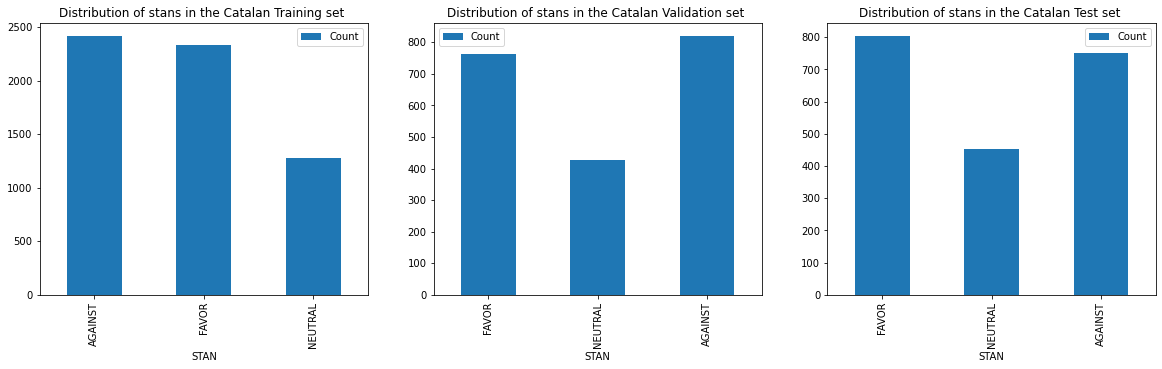

In [14]:
figure, axes = plt.subplots(1, 3,figsize=(20,5))

tr_list=[]
for label in tr_label_counts:
  tr_list.append([label,tr_label_counts[label],np.round(tr_label_counts[label] / len(catalan_train),3)])
tr_label = pd.DataFrame(tr_list,columns=['STAN','Count','Prior_probabilities'])
tr_label.plot.bar(x='STAN', y='Count', ax=axes[0])
axes[0].title.set_text("Distribution of stans in the Catalan Training set ")

val_list=[]
for label in val_label_counts:
  val_list.append([label,val_label_counts[label],np.round(val_label_counts[label] / len(catalan_val),3)])
val_label = pd.DataFrame(val_list,columns=['STAN','Count','Prior_probabilities'])
val_label.plot.bar(x='STAN', y='Count', ax=axes[1])
axes[1].title.set_text("Distribution of stans in the Catalan Validation set ")

test_list=[]
for label in test_label_counts:
  test_list.append([label,test_label_counts[label],np.round(test_label_counts[label] / len(catalan_test),3)])
test_label = pd.DataFrame(test_list,columns=['STAN','Count','Prior_probabilities'])
test_label.plot.bar(x='STAN', y='Count', ax=axes[2])
axes[2].title.set_text("Distribution of stans in the Catalan Test set ")

In [15]:
print("Label Distribution-Training set   Label Distribution-Validation set   Label Distribution-Test set")
display_side_by_side(tr_label,val_label, test_label)

Label Distribution-Training set   Label Distribution-Validation set   Label Distribution-Test set


,STAN,Count,Prior_probabilities
0,AGAINST,2416,0.401
1,FAVOR,2335,0.387
2,NEUTRAL,1277,0.212
,STAN,Count,Prior_probabilities
0,FAVOR,763,0.380
1,NEUTRAL,427,0.212
2,AGAINST,820,0.408
,STAN,Count,Prior_probabilities
0,FAVOR,804,0.400
1,NEUTRAL,454,0.226


# Spanish & Catalan - Combined

In [16]:
train_frq = spanish_train.groupby(['LABEL']).size().reset_index()
train_frq=train_frq.rename(columns={0:'Count'})
train_frq['language'] ='Spanish'

train_frq = pd.pivot_table(data=train_frq, index=['language'], columns=['LABEL'], values=['Count'])
train_frq.reset_index(inplace=True)
train_frq.columns = ['language', 'AGAINST','FAVOR','NEUTRAL']

print(train_frq)
print("\n")
train_frq1 = catalan_train.groupby(['LABEL']).size().reset_index()
train_frq1=train_frq1.rename(columns={0:'Count'})
train_frq1['language'] ='Catalan'

train_frq1 = pd.pivot_table(data=train_frq1, index=['language'], columns=['LABEL'], values=['Count'])
train_frq1.reset_index(inplace=True)
train_frq1.columns = ['language', 'AGAINST','FAVOR','NEUTRAL']

print(train_frq1)

  language  AGAINST  FAVOR  NEUTRAL
0  Spanish     2420   2515     1111


  language  AGAINST  FAVOR  NEUTRAL
0  Catalan     2416   2335     1277


In [17]:
frames=[train_frq,train_frq1]
train_final = pd.concat(frames)
train_final

,language,AGAINST,FAVOR,NEUTRAL
0,Spanish,2420,2515,1111
0,Catalan,2416,2335,1277


In [18]:
val_frq = spanish_val.groupby(['LABEL']).size().reset_index()
val_frq=val_frq.rename(columns={0:'Count'})
val_frq['language'] ='Spanish'

val_frq = pd.pivot_table(data=val_frq, index=['language'], columns=['LABEL'], values=['Count'])
val_frq.reset_index(inplace=True)
val_frq.columns = ['language', 'AGAINST','FAVOR','NEUTRAL']

print(val_frq)
print("\n")
val_frq1 = catalan_val.groupby(['LABEL']).size().reset_index()
val_frq1=val_frq1.rename(columns={0:'Count'})
val_frq1['language'] ='Catalan'

val_frq1 = pd.pivot_table(data=val_frq1, index=['language'], columns=['LABEL'], values=['Count'])
val_frq1.reset_index(inplace=True)
val_frq1.columns = ['language', 'AGAINST','FAVOR','NEUTRAL']

print(val_frq1)

  language  AGAINST  FAVOR  NEUTRAL
0  Spanish      856    782      377


  language  AGAINST  FAVOR  NEUTRAL
0  Catalan      820    763      427


In [19]:
frames=[val_frq,val_frq1]
val_final = pd.concat(frames)
val_final

,language,AGAINST,FAVOR,NEUTRAL
0,Spanish,856,782,377
0,Catalan,820,763,427


In [20]:
test_frq = spanish_test.groupby(['LABEL']).size().reset_index()
test_frq=test_frq.rename(columns={0:'Count'})
test_frq['language'] ='Spanish'

test_frq = pd.pivot_table(data=test_frq, index=['language'], columns=['LABEL'], values=['Count'])
test_frq.reset_index(inplace=True)
test_frq.columns = ['language', 'AGAINST','FAVOR','NEUTRAL']

print(test_frq)
print("\n")
test_frq1 = catalan_test.groupby(['LABEL']).size().reset_index()
test_frq1=test_frq1.rename(columns={0:'Count'})
test_frq1['language'] ='Catalan'

test_frq1 = pd.pivot_table(data=test_frq1, index=['language'], columns=['LABEL'], values=['Count'])
test_frq1.reset_index(inplace=True)
test_frq1.columns = ['language', 'AGAINST','FAVOR','NEUTRAL']

print(test_frq1)

  language  AGAINST  FAVOR  NEUTRAL
0  Spanish      829    807      380


  language  AGAINST  FAVOR  NEUTRAL
0  Catalan      752    804      454


In [21]:
frames=[test_frq,test_frq1]
test_final = pd.concat(frames)
test_final

,language,AGAINST,FAVOR,NEUTRAL
0,Spanish,829,807,380
0,Catalan,752,804,454


<AxesSubplot:title={'center':'Test Set'}, xlabel='language'>

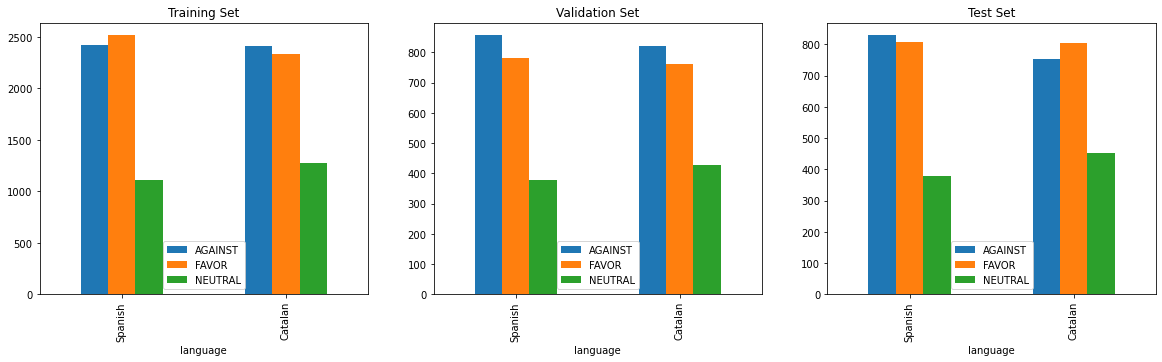

In [22]:
fig, axes = plt.subplots(1,3, figsize=(20,5))

train_final.plot(x='language', y=['AGAINST','FAVOR','NEUTRAL'], kind='bar', ax=axes[0], title='Training Set')
val_final.plot(x='language', y=['AGAINST','FAVOR','NEUTRAL'], kind='bar', ax=axes[1], title='Validation Set')
test_final.plot(x="language", y=["AGAINST", "FAVOR",'NEUTRAL'], kind="bar", ax=axes[2], title='Test Set')